In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(x_train,y_train), (x_test,y_test)=mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [72]:
single_image = x_train[69]

In [73]:
single_image.shape

(28, 28, 1)

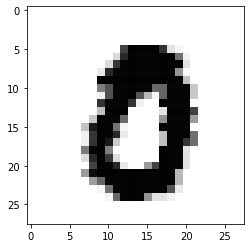

In [74]:
plt.imshow(single_image,cmap='Greys')

In [10]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [11]:
from tensorflow.keras.utils import to_categorical

In [12]:
y_train.shape

(60000,)

In [23]:
example = to_categorical(y_train)


In [24]:
example.shape

(60000, 10)

In [25]:
example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [14]:
y_cat_test = to_categorical(y_test)
y_cat_train = to_categorical(y_train)

In [15]:
#since we already know and assume about our test data we can just divide by the max number to scale both the x-train and x-test.
x_train = x_train/255
x_test = x_test/255

In [19]:
x_train.shape

(60000, 28, 28, 1)

In [17]:
#batch_size,width,height,color_channels
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [18]:
x_test.shape

(10000, 28, 28, 1)

In [20]:
from tensorflow.keras.models import Sequential

In [21]:
#convulsion for 2D, pooling for 2D, Flattening for the last part of the classification.
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [63]:
model = Sequential()

model.add(Conv2D(filters=64,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(32,activation='relu'))

#output layer
model.add(Dense(10,activation='softmax'))
#keras.io/metrics
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [64]:
from tensorflow.keras.callbacks import EarlyStopping

In [65]:
early_stopping = EarlyStopping(monitor='val_loss',patience=1)

In [66]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stopping])

Epoch 1/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1617 - accuracy: 0.9521 - val_loss: 0.0608 - val_accuracy: 0.9810
Epoch 2/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0576 - accuracy: 0.9823 - val_loss: 0.0457 - val_accuracy: 0.9856
Epoch 3/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0389 - accuracy: 0.9883 - val_loss: 0.0441 - val_accuracy: 0.9850
Epoch 4/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0291 - accuracy: 0.9907 - val_loss: 0.0425 - val_accuracy: 0.9868
Epoch 5/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0213 - accuracy: 0.9931 - val_loss: 0.0430 - val_accuracy: 0.9872


In [67]:
metrics = pd.DataFrame(model.history.history)

In [68]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.161733,0.952067,0.060772,0.9810
1,0.057632,0.982333,0.045742,0.9856
2,0.038880,0.988300,0.044082,0.9850
3,0.029070,0.990717,0.042540,0.9868
4,0.021252,0.993083,0.043018,0.9872


In [38]:
from sklearn.metrics import classification_report,confusion_matrix

In [69]:
predictions = model.predict_classes(x_test)

In [42]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [75]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.98      0.99      0.98      1032
           3       0.98      1.00      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.99      0.99       892
           6       0.98      0.99      0.99       958
           7       0.99      0.98      0.98      1028
           8       0.99      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [76]:
confusion_matrix(y_test,predictions)

array([[ 974,    0,    0,    1,    0,    1,    1,    0,    2,    1],
       [   0, 1132,    0,    0,    1,    0,    1,    1,    0,    0],
       [   1,    0, 1017,    3,    1,    0,    3,    5,    2,    0],
       [   0,    0,    1, 1007,    0,    1,    0,    0,    1,    0],
       [   1,    0,    1,    0,  964,    0,    6,    0,    0,   10],
       [   1,    0,    0,    7,    0,  883,    1,    0,    0,    0],
       [   4,    2,    0,    1,    2,    1,  948,    0,    0,    0],
       [   0,    2,   10,    1,    0,    0,    0, 1011,    1,    3],
       [   3,    0,    5,    4,    0,    2,    3,    3,  950,    4],
       [   2,    1,    0,    5,    2,    7,    0,    5,    1,  986]],
      dtype=int64)

<AxesSubplot:>

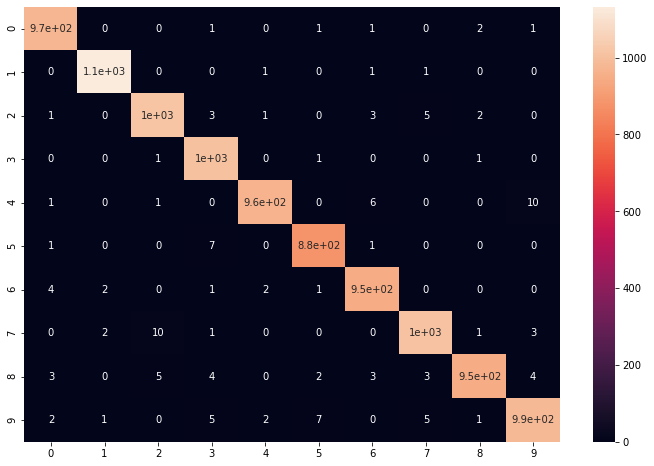

In [77]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

<AxesSubplot:>

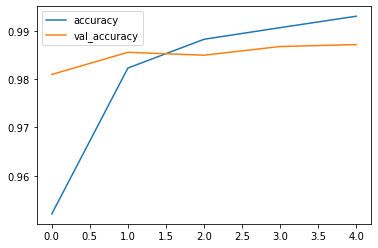

In [78]:
metrics[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

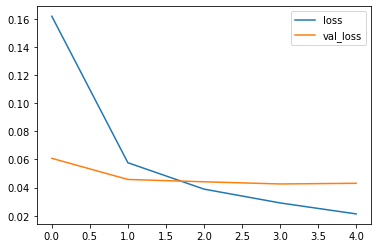

In [79]:
metrics[['loss','val_loss']].plot()

In [85]:
model.predict_classes(x_test[100].reshape(1,28,28,1))

array([6], dtype=int64)